In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
g = 10
h = 100
L = 250e3
K = 0.8e-3
omega = 1.4e-4
period = 2*np.pi/omega
print (period/3600.)
A = 20
co = np.sqrt(g*h)
wavelength = co*period
print (co, wavelength/4.)
fric_r = np.sqrt(1+(K + 2*A/L**2)**2/omega**2) * np.cos(0.5*np.arctan2(K+2*A/L**2,omega))
fric_i = np.sqrt(1+(K + 2*A/L**2)**2/omega**2) * np.sin(0.5*np.arctan2(K+2*A/L**2,omega))
tr = fric_r*omega/co
ti = fric_i*omega/co
x = np.arange(-250e3,0+1e3,1e3)
eta0 = 0.5
print (fric_r, fric_i)

12.466637514245212
31.6227766017 354806.723778
4.44152247719 3.73175448737


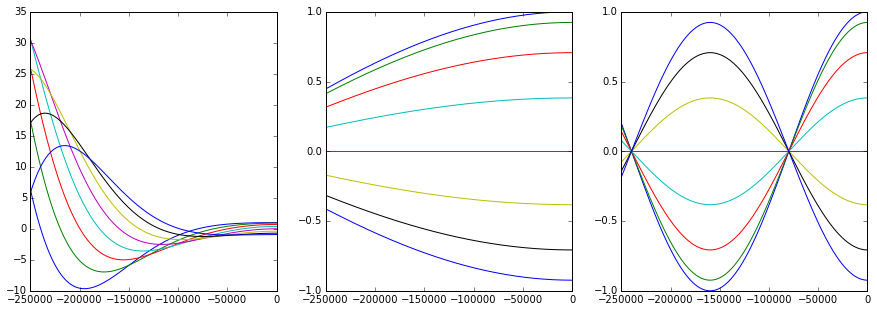

In [18]:
k = 2*np.pi/wavelength
fig, ax = plt.subplots(1,3,figsize=(15,5))
for t in np.arange(0,np.pi/omega,np.pi/8./omega):
    eta = eta0 * np.exp(-x*ti) * np.cos(x*tr-omega*t) \
        + eta0 * np.exp(x*ti) * np.cos(-x*tr-omega*t) 
    etar = ( eta0 * np.cos(x*tr - omega*t)
        + eta0 *np.cos(-x*tr - omega*t) )
    etafree = ( eta0 * np.cos(x*k - omega*t)
        + eta0 *np.cos(-x*k - omega*t) )
    ax[0].plot(x,eta)
    ax[1].plot(x,etafree)
    ax[2].plot(x,etar)

-78.3358443262 0.032163894351


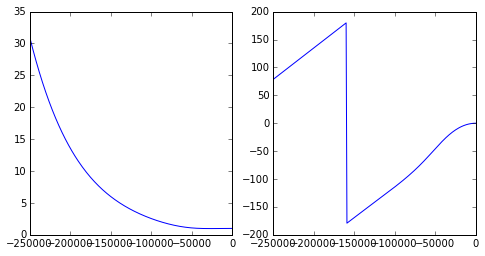

In [23]:
etac = eta0 * (np.exp(-x*ti) * np.cos(x*tr) + 
                    np.exp(x*ti) * np.cos(-x*tr))
etas = eta0 * (np.exp(-x*ti) * np.sin(x*tr) +
                    np.exp(x*ti) * np.sin(-x*tr))
amp = np.sqrt(etac**2+etas**2)
pha = np.arctan2(etas,etac)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x,amp)
plt.subplot(1,2,2)
plt.plot(x,pha*180./np.pi)
print ((pha[-1]-pha[0])*180./np.pi, amp[-1]/amp[0])

14.876117818 1.07045561956


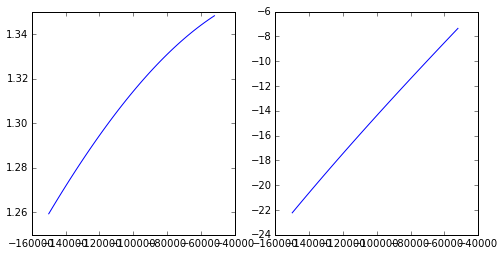

In [25]:
x0 = -50e3
x = np.arange(-150e3,-50e3,2e3)
h2=150.
nk = omega/np.sqrt(g*h2)
etac = eta0 * (np.exp(-x0*ti) * np.cos(x*nk) + 
                    np.exp(x0*ti) * np.cos(-x*nk))
etas = eta0 * (np.exp(-x0*ti) * np.sin(x*nk) +
                    np.exp(x0*ti) * np.sin(-x*nk))
amp = np.sqrt(etac**2+etas**2)
pha = np.arctan2(etas,etac)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x,amp)
plt.subplot(1,2,2)
plt.plot(x,pha*180./np.pi)
print ((pha[-1]-pha[0])*180./np.pi, amp[-1]/amp[0])